# EXPLORATORY DATA ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import plotly.express as px
from matplotlib.patches import Patch


In [3]:
df = pd.read_csv('DadosTratados.csv')
df.shape

(74475, 20)

In [4]:
# Data Dictionary 
data_dict = {
    'STATUS_ATUAL': 'Current status of the product/service',
    'PRODUTO': 'Name of the product/service',
    'STATUS_INICIAL': 'Initial status of the product/service',
    'CONSULTOR': 'Name of the consultant who sent the messages',
    'DATA_DO_HOTZAP': 'Date of the bot message',
    '1O_CONTATO': 'Date of the first human message',
    '2O_CONTATO': 'Date of the second human message',
    '3O_CONTATO': 'Date of the third human message',
    '4O_CONTATO': 'Date of the fourth human message',
    'FATURAMENTO': 'Revenue generated from the transaction',
    'DDD': 'Area code of the cellphone (related to the state)',
    'TIPO_SERVICO': 'Type of service',
    'TX_COMISSAO': 'Commission percentage',
    'CLIENTE': 'Name of the client',
    'N_contatos': 'Number of contacts made',
    'mulher': '1 if the consultant is a woman, 0 otherwise',
    'tempo_contato': 'Time between the first bot message sent and the first human message sent',
    'minutos_1contato': 'Minutes between the first bot message sent and the first human message sent',
    'SUCESSO': '1 if sale completed, 0 otherwise',
    'ESTADO': 'State in Brazil where the buyer lives'
}

# Service Types
* Assinatura: This is Portuguese for "subscription." It refers to a recurring payment model where customers pay a regular fee (often monthly or annually) to access a product or service.
* Downsell: In sales and marketing, a downsell is an offer made to a customer who has declined a higher-priced offer. It's a way to still make a sale by presenting a less expensive alternative.
* E-commerce: Short for electronic commerce, e-commerce refers to the buying and selling of goods and services over the internet.
* Lançamento: This is Portuguese for "launch." It usually refers to the launch of a new product, service, or campaign.
* Lista: This is Portuguese for "list." In various contexts, it could refer to a list of items, names, or other organized information.
* Meteórico: This is Portuguese for "meteoric." It typically describes something that rises or progresses very rapidly, often in the context of success or fame.
* Perpétuo: This is Portuguese for "perpetual" or "everlasting." It refers to something that continues indefinitely, without interruption or end.

In [5]:
df['TIPO_SERVICO'] = df['TIPO_SERVICO'].str.replace('LanÃ§amento', 'Lançamento') \
                                        .str.replace('PerpÃ©tuo', 'Perpétuo') \
                                        .str.replace('MeteÃ³rico', 'Meteórico')

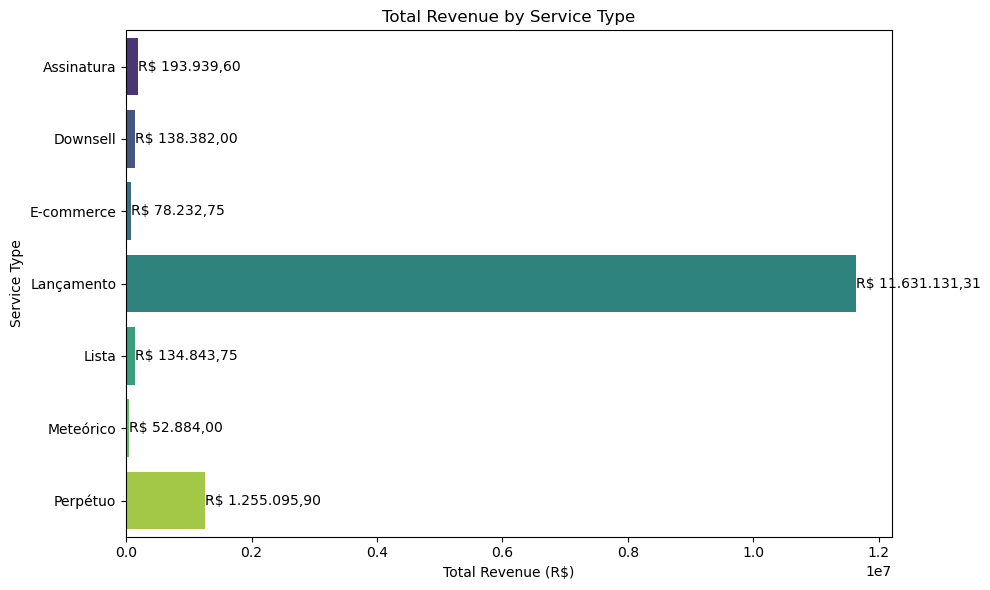

In [6]:
# Set the locale to Brazilian Portuguese
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
revenue_by_service = df.groupby('TIPO_SERVICO')['FATURAMENTO'].sum()
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=revenue_by_service, y=revenue_by_service.index, palette='viridis')

for index, value in enumerate(revenue_by_service):
    formatted_value = locale.currency(value, grouping=True, symbol="R$")
    plt.text(value, index, formatted_value, ha='left', va='center')
plt.xlabel('Total Revenue (R$)')
plt.ylabel('Service Type')
plt.title('Total Revenue by Service Type')
plt.tight_layout()
plt.show()

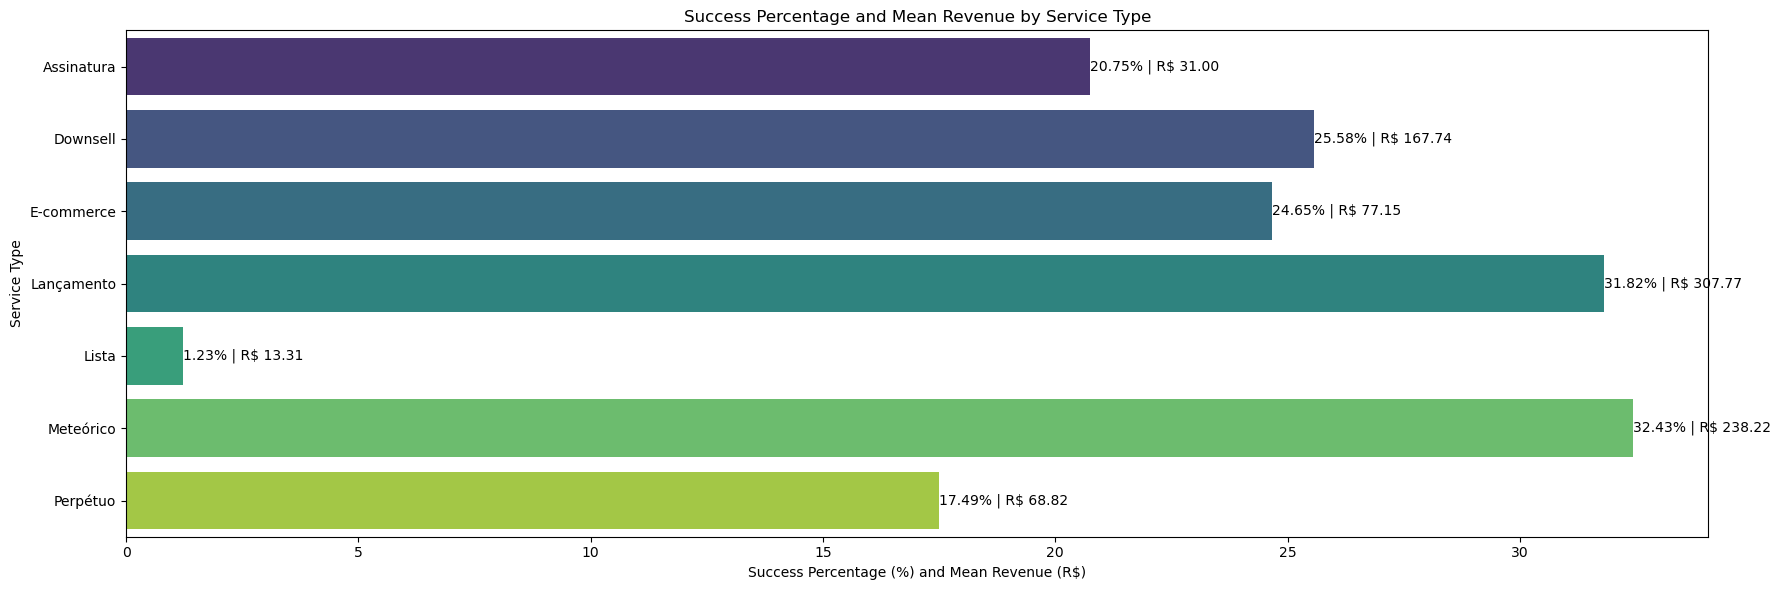

In [7]:
plt.figure(figsize=(18, 6))  

success_percentage = (df.groupby('TIPO_SERVICO')['SUCESSO'].mean() * 100).reset_index()
mean_revenue = df.groupby('TIPO_SERVICO')['FATURAMENTO'].mean().reset_index()

# Merge the success percentage and mean revenue DataFrames on 'TIPO_SERVICO'
merged_df = success_percentage.merge(mean_revenue, on='TIPO_SERVICO')

# Plot the bar graph
sns.barplot(x='SUCESSO', y='TIPO_SERVICO', data=merged_df, palette='viridis')

# Annotate each bar with the success percentage and mean revenue
for index, row in merged_df.iterrows():
    plt.text(row['SUCESSO'], index, f'{row["SUCESSO"]:.2f}% | R$ {row["FATURAMENTO"]:.2f}', ha='left', va='center')

plt.xlabel('Success Percentage (%) and Mean Revenue (R$)')
plt.ylabel('Service Type')
plt.title('Success Percentage and Mean Revenue by Service Type')
plt.tight_layout()
plt.show()

In [8]:
df.TIPO_SERVICO.value_counts()

TIPO_SERVICO
Lançamento    37792
Perpétuo      18238
Lista         10128
Assinatura     6256
E-commerce     1014
Downsell        825
Meteórico       222
Name: count, dtype: int64

* From this insights, it appears that the effort put into "Lista" may not be worthwhile, given its low positive return of only 1.23% of contacts. This percentage is notably lower compared to the others types of products.

* Our launch products stand out as the area where we are most active and where we achieve the best return/revenue ratio. With a positive return in 31.82% of contacts and an average revenue of R$307.77 for each positive case, it's the sector that truly drives our business.

* "Meteórico" products also show promise, but their scarcity in the market poses a challenge. Nonetheless, we've found similar good results to those of launch products.

* The remaining products tend to behave quite similarly, indicating that there may not be a significant difference between the types and their conversions

# Gender of the consultant

C:\Users\bruno\AppData\Local\Temp\ipykernel_21420\2009464305.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])


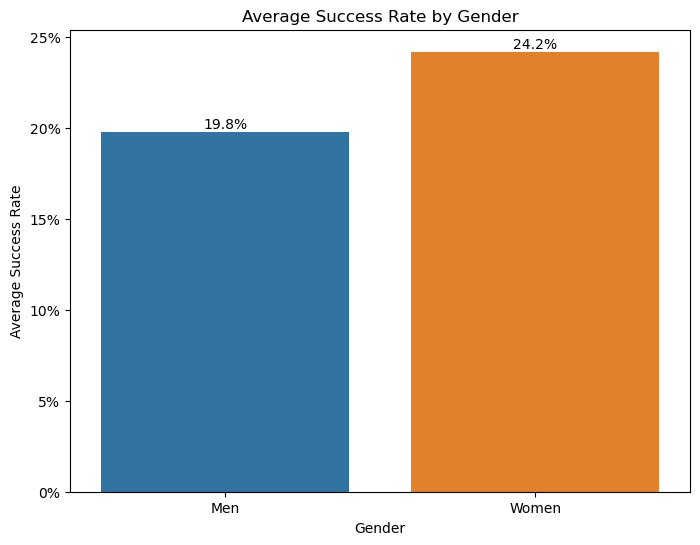

In [9]:
average_success_by_gender = df.groupby('mulher')['SUCESSO'].mean()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Men', 'Women'], y=average_success_by_gender.values)

# Format y-axis ticks as percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])

plt.xlabel('Gender')
plt.ylabel('Average Success Rate')
plt.title('Average Success Rate by Gender')

# Annotate bars with percentages
for i in range(len(average_success_by_gender)):
    ax.text(i, average_success_by_gender.values[i], '{:.1f}%'.format(average_success_by_gender.values[i]*100),
            ha='center', va='bottom')

plt.show()


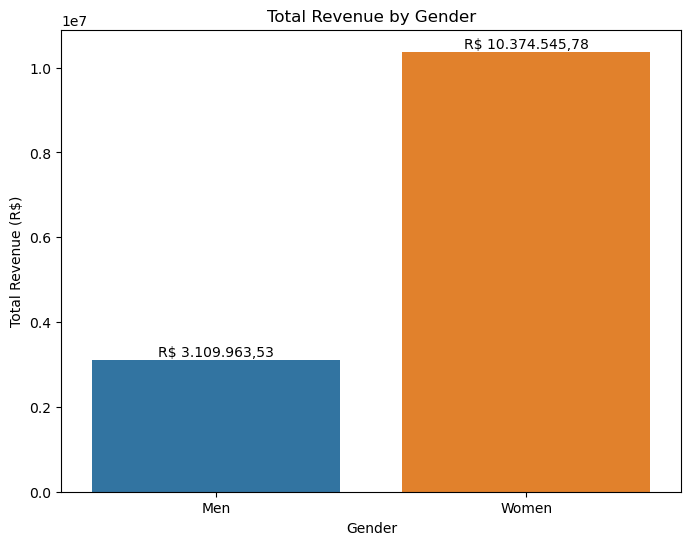

In [10]:
total_revenue_by_gender = df.groupby('mulher')['FATURAMENTO'].sum()
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Assuming you've already calculated total_revenue_by_gender
# Plot the bar graph using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Men', 'Women'], y=total_revenue_by_gender.values)

plt.xlabel('Gender')
plt.ylabel('Total Revenue (R$)')
plt.title('Total Revenue by Gender')

# Annotate bars with the total revenue in R$ with thousands separators
for i in range(len(total_revenue_by_gender)):
    revenue = total_revenue_by_gender.values[i]
    formatted_revenue = locale.currency(revenue, grouping=True, symbol="R$")
    ax.text(i, revenue, formatted_revenue, ha='center', va='bottom')

plt.show()


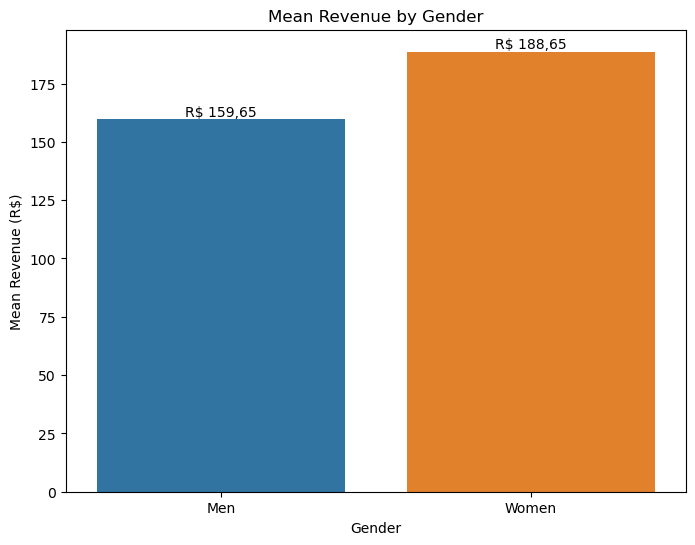

In [11]:
mean_revenue_by_gender = df.groupby('mulher')['FATURAMENTO'].mean()
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Assuming you've already calculated total_revenue_by_gender
# Plot the bar graph using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Men', 'Women'], y=mean_revenue_by_gender.values)

plt.xlabel('Gender')
plt.ylabel('Mean Revenue (R$)')
plt.title('Mean Revenue by Gender')

# Annotate bars with the total revenue in R$ with thousands separators
for i in range(len(total_revenue_by_gender)):
    revenue = mean_revenue_by_gender.values[i]
    formatted_revenue = locale.currency(revenue, grouping=True, symbol="R$")
    ax.text(i, revenue, formatted_revenue, ha='center', va='bottom')

plt.show()


# Hypothesis test to see if women perform better

In [12]:
# Separate data for women and men
women_success = df[df['mulher'] == 1]['SUCESSO']
men_success = df[df['mulher'] == 0]['SUCESSO']

# Perform two-sample z-test
successes = np.array([women_success.sum(), men_success.sum()])
nobs = np.array([len(women_success), len(men_success)])

stat, p_value = proportions_ztest(successes, nobs, alternative='larger')

# Print results
print("Z-Statistic:", stat)
print("P-Value:", p_value)
# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Women have a significantly higher success rate than men.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in success rates between women and men.")


Z-Statistic: 12.512259027621107
P-Value: 3.1989236704610607e-36
Reject the null hypothesis. Women have a significantly higher success rate than men.


* An analysis of our dataset reveals compelling evidence indicating that not only do women outperform men in terms of success rates, but they also contribute significantly more revenue, particularly in successfully recovered products. Specifically, women account for a substantial 77% of the total company revenue.

* These findings suggest that employing more women for such roles may be a strategically advantageous decision. Their demonstrated effectiveness in persuasion and communication skills significantly contributes to their success rates and revenue generation.

* In light of these insights, it may be prudent to consider a strategic shift towards recruiting more women for these roles, leveraging their demonstrated capabilities to enhance overall business performance and revenue generation.

# Differences between states

In [13]:
# Define a dictionary mapping states to regions
state_to_region = {
    'SP': 'Sudeste', 'RJ': 'Sudeste', 'MG': 'Sudeste', 'ES': 'Sudeste',
    'BA': 'Nordeste', 'SE': 'Nordeste', 'AL': 'Nordeste', 'PE': 'Nordeste', 'PB': 'Nordeste',
    'RN': 'Nordeste', 'CE': 'Nordeste', 'PI': 'Nordeste', 'MA': 'Nordeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul',
    'AM': 'Norte', 'RR': 'Norte', 'AP': 'Norte', 'PA': 'Norte', 'TO': 'Norte',
    'RO': 'Norte', 'AC': 'Norte',
    'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'DF': 'Centro-Oeste'
}
# Map states to regions and calculate invoice counts per region
df['REGIAO'] = df['ESTADO'].map(state_to_region)

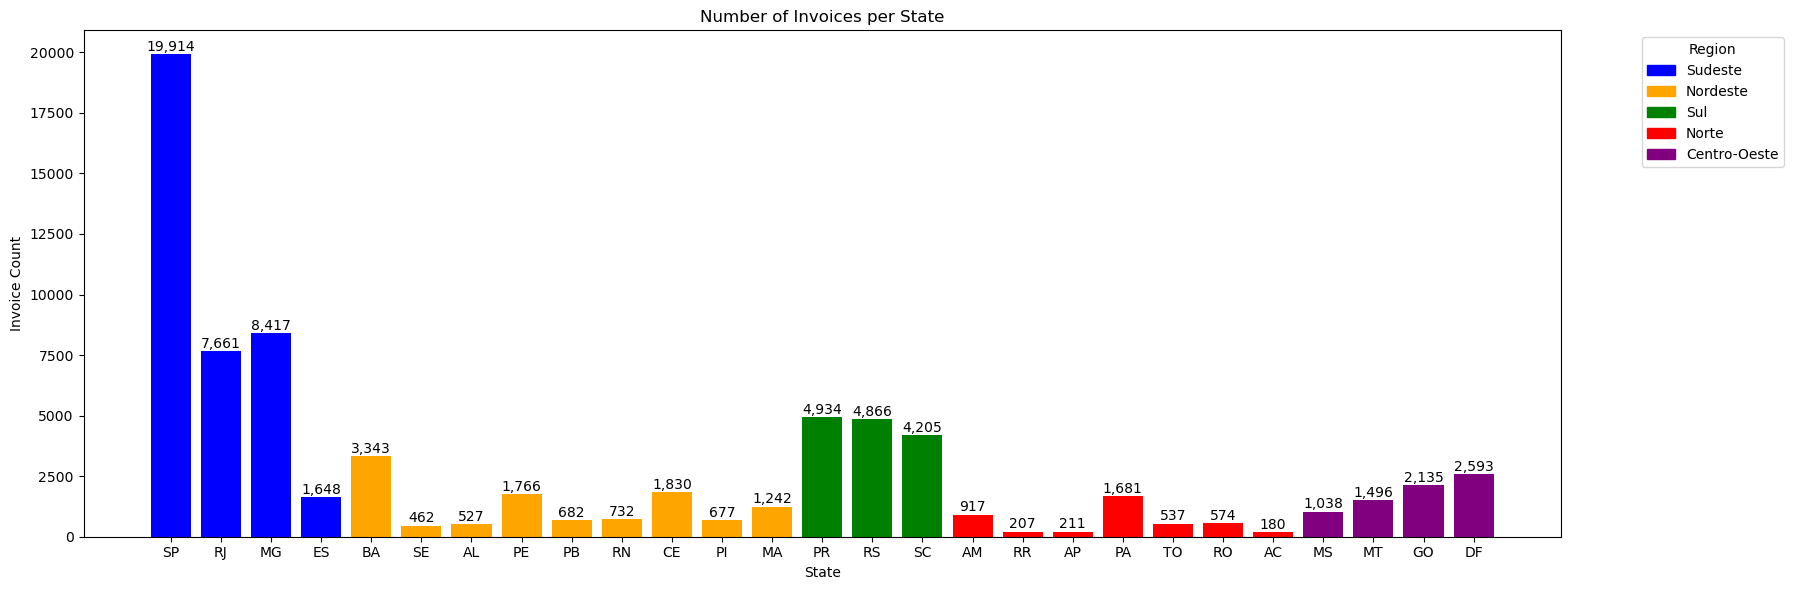

In [14]:
# Calculate the invoice count per state
states_count = df.groupby('ESTADO')['FATURAMENTO'].count()

# Define a dictionary to map regions to colors
region_colors = {
    'Sudeste': 'blue',
    'Nordeste': 'orange',
    'Sul': 'green',
    'Norte': 'red',
    'Centro-Oeste': 'purple'
}
# Plot the bar graph
plt.figure(figsize=(18, 6))
patches = []
for state, region in state_to_region.items():
    bar = plt.bar(state, states_count[state], color=region_colors[region])
    plt.text(state, states_count[state] + 10, '{:,.0f}'.format(states_count[state]), ha='center', va='bottom')
    if len(patches) < 5 and region not in [patch.get_label() for patch in patches]:
        patches.append(Patch(color=region_colors[region], label=region))

# Add legend
plt.legend(handles=patches, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('State')
plt.ylabel('Invoice Count')
plt.title('Number of Invoices per State')
plt.tight_layout()
plt.show()

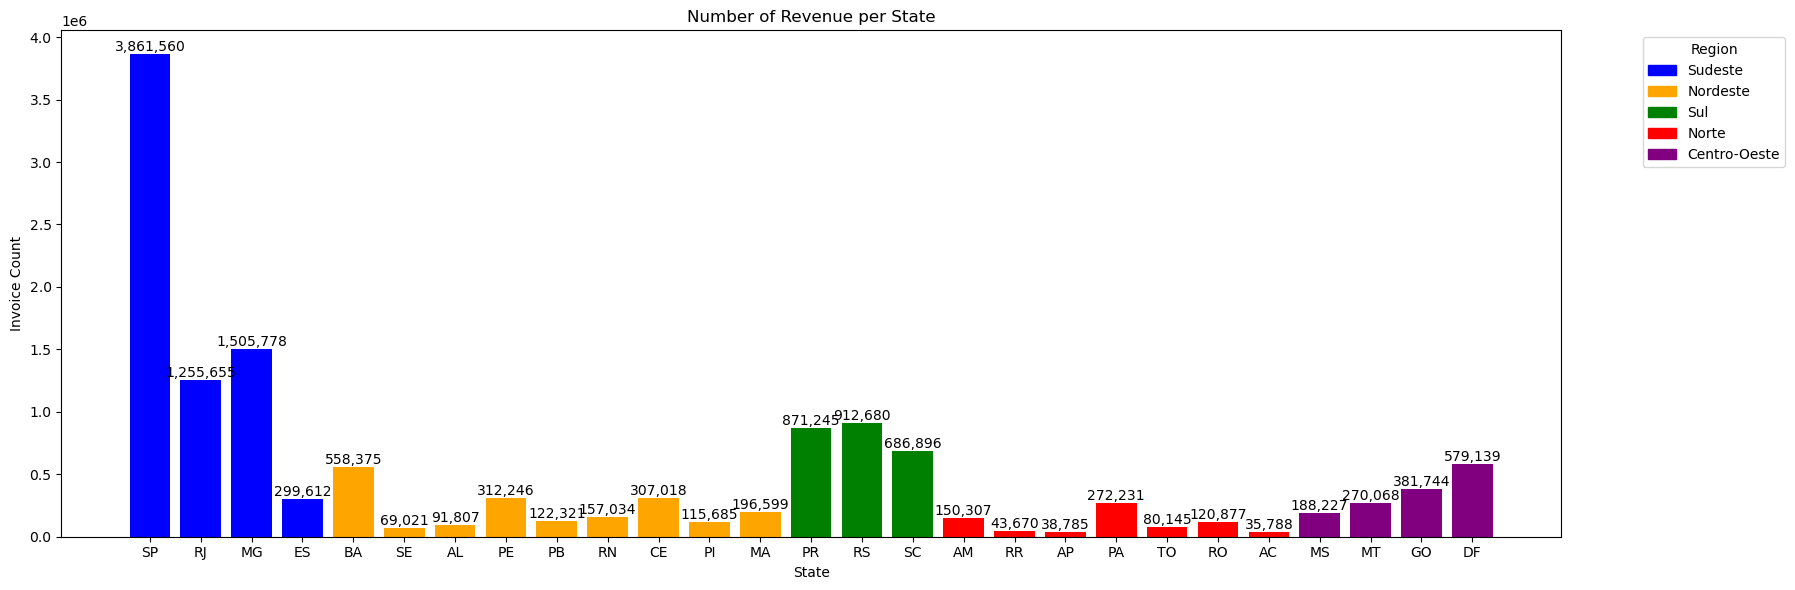

In [15]:
states_revenue_sum = df.groupby('ESTADO')['FATURAMENTO'].sum()
# Plot the bar graph
plt.figure(figsize=(18, 6))
patches = []
for state, region in state_to_region.items():
    bar = plt.bar(state, states_revenue_sum[state], color=region_colors[region])
    plt.text(state, states_revenue_sum[state] + 10, '{:,.0f}'.format(states_revenue_sum[state]), ha='center', va='bottom')
    if len(patches) < 5 and region not in [patch.get_label() for patch in patches]:
        patches.append(Patch(color=region_colors[region], label=region))

# Add legend
plt.legend(handles=patches, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('State')
plt.ylabel('Invoice Count')
plt.title('Number of Revenue per State')
plt.tight_layout()
plt.show()

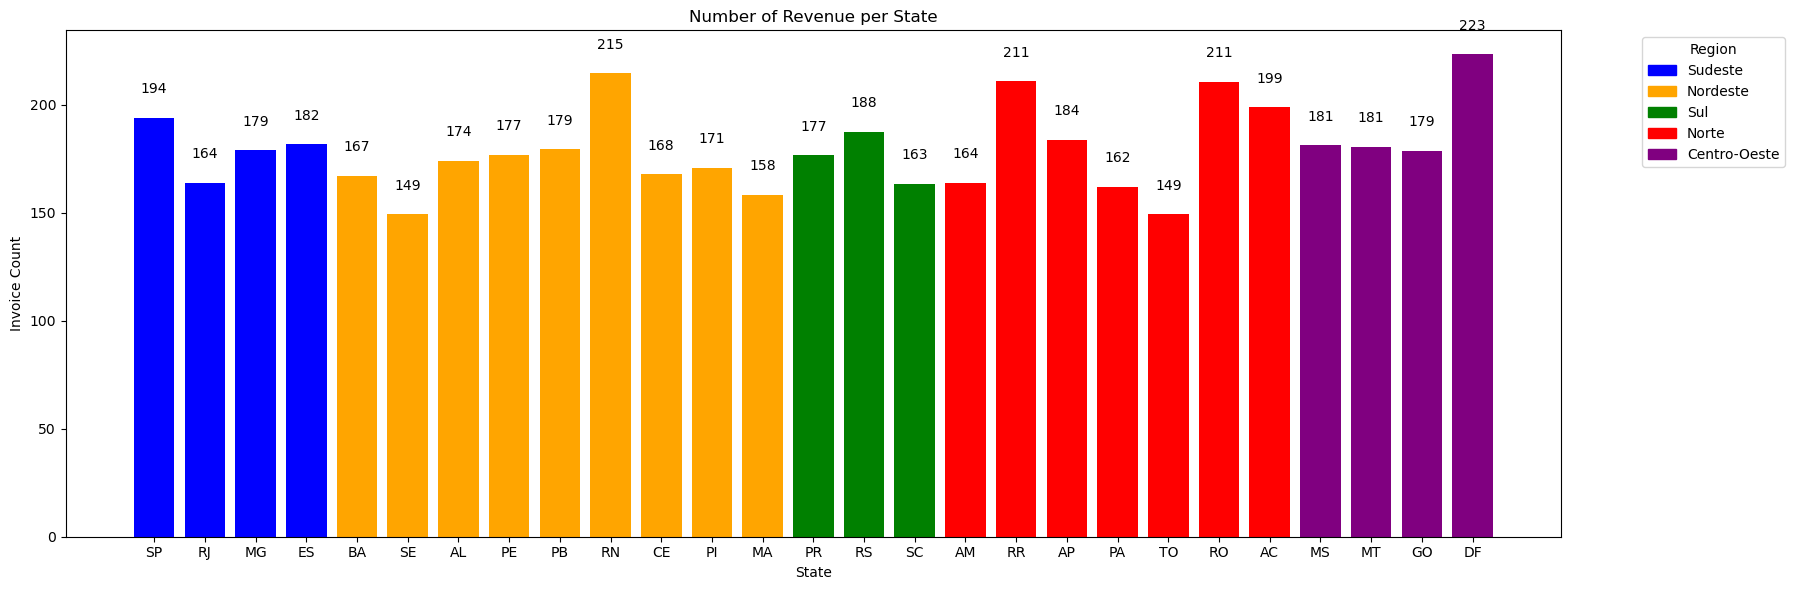

In [16]:
states_revenue_mean = df.groupby('ESTADO')['FATURAMENTO'].mean()
# Plot the bar graph
plt.figure(figsize=(18, 6))
patches = []
for state, region in state_to_region.items():
    bar = plt.bar(state, states_revenue_mean[state], color=region_colors[region])
    plt.text(state, states_revenue_mean[state] + 10, '{:,.0f}'.format(states_revenue_mean[state]), ha='center', va='bottom')
    if len(patches) < 5 and region not in [patch.get_label() for patch in patches]:
        patches.append(Patch(color=region_colors[region], label=region))

# Add legend
plt.legend(handles=patches, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('State')
plt.ylabel('Invoice Count')
plt.title('Number of Revenue per State')
plt.tight_layout()
plt.show()

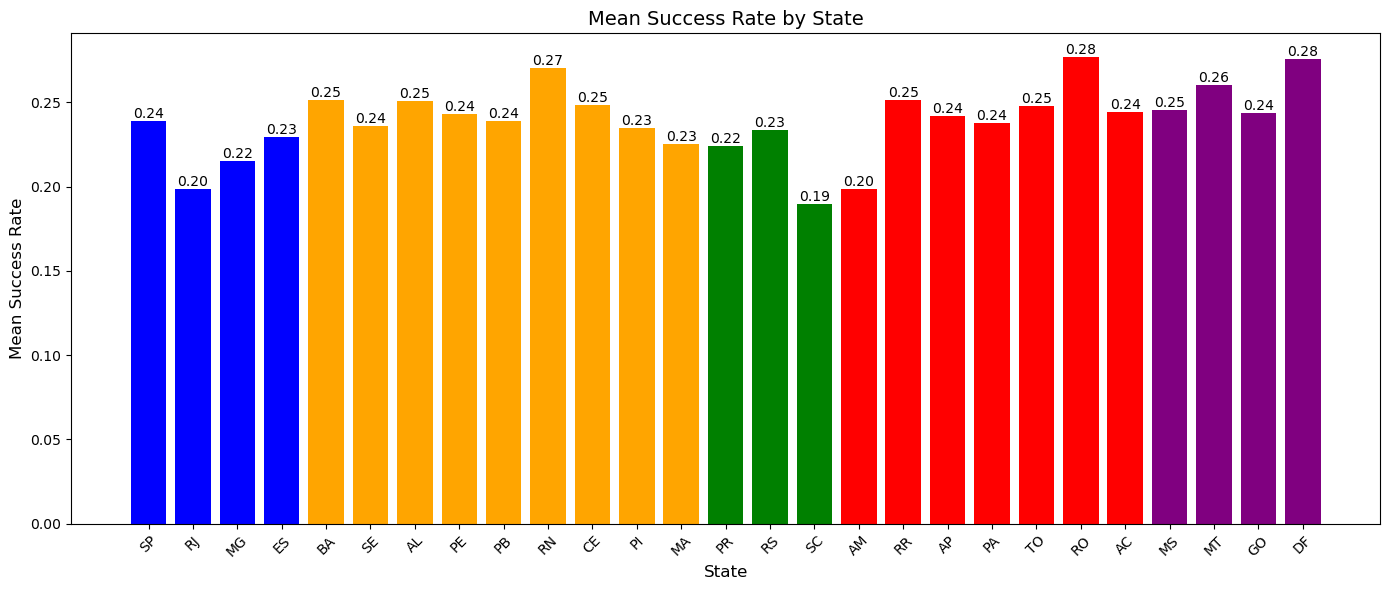

In [17]:
mean_success_rate = df.groupby('ESTADO')['SUCESSO'].mean()

# Plot the bar graph using region colors
plt.figure(figsize=(14, 6))
for state, region in state_to_region.items():
    plt.bar(state, mean_success_rate[state], color=region_colors[region])
    plt.text(state, mean_success_rate[state], f'{mean_success_rate[state]:.2f}', ha='center', va='bottom')
plt.xlabel('State', fontsize=12)
plt.ylabel('Mean Success Rate', fontsize=12)
plt.title('Mean Success Rate by State', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Considerations
* We can conclude that the states in the Southeast, especially São Paulo, Rio de Janeiro, and Minas Gerais, concentrate the majority of clients in Brazil. This high volume of clients is also reflected in significant revenue over time. However, when we analyze the average values, we do not find significant differences among these states.

* Furthermore, the success of sales (success rate) does not vary significantly among the states. The difference between the minimum and maximum values is only 9 percentage points. Therefore, engaging with clients from all states is a valid strategy and is not an effort in vain.

* In summary, it is important to maintain a comprehensive approach, catering to clients from different states, to optimize results.

# Success Rate between number of contacts

In [18]:
success_rate_ncontacts = df.groupby('N_contatos')['SUCESSO'].mean()
success_rate_ncontacts

N_contatos
2    0.326912
3    0.219857
4    0.103051
5    0.062478
Name: SUCESSO, dtype: float64

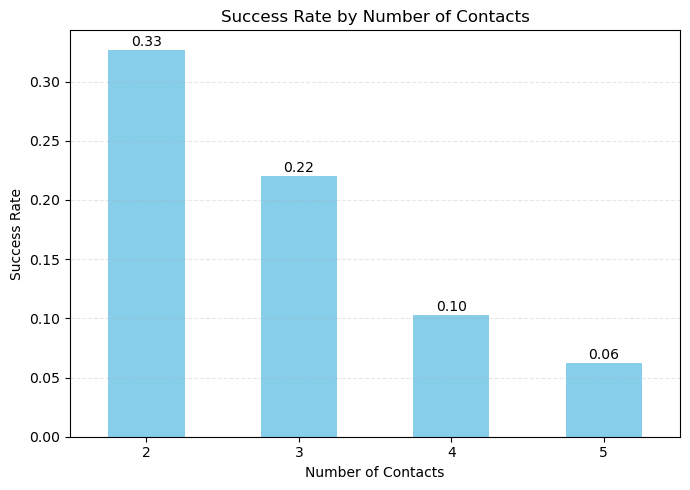

In [19]:
plt.figure(figsize=(7,5))
success_rate_ncontacts.plot(kind='bar', color='skyblue')
plt.title('Success Rate by Number of Contacts')
plt.xlabel('Number of Contacts')
plt.ylabel('Success Rate')
plt.xticks(rotation=0)
for i, value in enumerate(success_rate_ncontacts):
    plt.text(i, value + 0.001, '{:.2f}'.format(value), ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Conclusions
* Com base no gráfico, podemos inferir que a probabilidade de conversão de uma compra é maior quando há apenas dois contatos (o primeiro sendo robótico e o segundo humano) em comparação com o terceiro contato. No entanto, à medida que o número de contatos aumenta para o quarto e quinto, a probabilidade de conversão diminui para menos de 10%.

* Isso sugere que, dependendo do esforço empregado nos quarto e quinto contatos, pode não ser vantajoso no longo prazo, pois o tempo e recursos poderiam ser mais bem investidos em novos potenciais clientes. Esta análise destaca a importância da eficiência na alocação de recursos e no planejamento estratégico das interações com os clientes para otimizar as taxas de conversão.

# Sucess Rate based on the minutes between the first human message to the automated first message

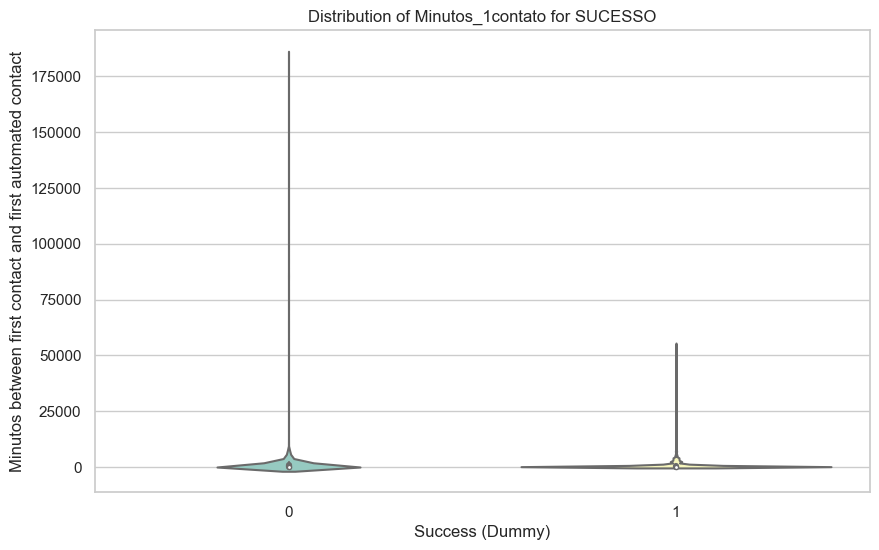

In [24]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='SUCESSO', y='minutos_1contato', data=df, palette="Set3")

# Add labels and title
plt.xlabel('Success (Dummy)')
plt.ylabel('Minutos between first contact and first automated contact')
plt.title('Distribution of Minutos_1contato for SUCESSO')

# Show plot
plt.show()


In [25]:
from scipy.stats import ttest_ind

# Split the data into two groups based on 'SUCESSO'
success_1 = df[df['SUCESSO'] == 1]['minutos_1contato']
success_0 = df[df['SUCESSO'] == 0]['minutos_1contato']

# Perform the t-test
t_stat, p_value = ttest_ind(success_1, success_0)

# Print the results
print("T-test statistic:", t_stat)
print("P-value:", p_value)

# Check significance
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in mean 'minutos_1contato' between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean 'minutos_1contato' between the two groups.")


T-test statistic: -18.300794706173775
P-value: 1.189719343919265e-74
Reject the null hypothesis: There is a significant difference in mean 'minutos_1contato' between the two groups.


# Conclusion
* The violin plot demonstrates a clear trend: when 'minutos_1contato' is lower, the chances of purchase conversion ('SUCESSO' = 1) are higher. This is evidenced by the narrower distribution of 'minutos_1contato' for 'SUCESSO' = 1 compared to 'SUCESSO' = 0.

* Furthermore, the t-test confirms this relationship, showing a significant difference in mean 'minutos_1contato' between the two groups.

* In summary, shorter 'minutos_1contato' durations are associated with a greater likelihood of purchase conversion.

In [ ]:
df.to_csv('DadosModelagem.csv')